Wealthiest Neighborhood in Pittsburgh
 Author: Jayden Manson
 Submetric: Average Household Income
 Dataset: Pittsburgh SNAP Census Data (Education & Income)

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Education_income_2010.csv")

df = df[['Neighborhood' ,"2009 Median Income ('09 Dollars)"]]

df = df.rename(columns={'Neighborhood':"neighborhood" ,"2009 Median Income ('09 Dollars)":"med_income_09"})
df.columns
print(df.head(10))

        neighborhood med_income_09
0   Allegheny Center      $20,911 
1     Allegheny West      $41,761 
2          Allentown      $29,274 
3          Arlington      $25,119 
4  Arlington Heights       $9,417 
5         Banksville      $50,625 
6  Bedford Dwellings       $9,992 
7          Beechview      $36,602 
8        Beltzhoover      $33,869 
9         Bloomfield      $30,830 


In [4]:
df['med_income_09'] = (
    df['med_income_09']
    .astype(str)
    .str.replace('[\$,]', '', regex=True)
    .str.strip()
)
df['med_income_09'] = pd.to_numeric(df['med_income_09'], errors='coerce')
df = df.dropna(subset=['med_income_09'])

print(df['med_income_09'])

0     20911
1     41761
2     29274
3     25119
4      9417
      ...  
85    31779
86    41250
87    20962
88    49877
89    40982
Name: med_income_09, Length: 90, dtype: int64


In [5]:
wealthiest = df.sort_values(by="med_income_09", ascending=False)
wealthiest.head(10)

,neighborhood,med_income_09
70,South Shore,150250
62,Point Breeze,87802
75,Squirrel Hill North,83861
54,New Homestead,83167
56,North Shore,82650
65,Regent Square,77647
81,Swisshelm Park,72500
79,Strip District,64868
39,Highland Park,61455
66,Ridgemont,56250


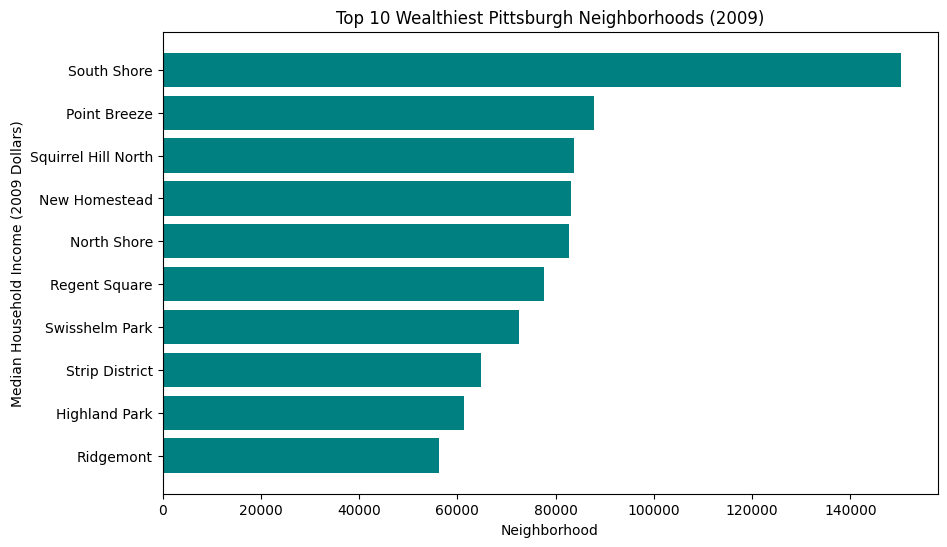

In [8]:
top10 = wealthiest.head(10)
plt.figure(figsize=(10,6))
plt.barh(top10['neighborhood'], top10['med_income_09'], color='teal')
plt.ylabel("Median Household Income (2009 Dollars)", color ='black')
plt.xlabel("Neighborhood",color ='black')
plt.title("Top 10 Wealthiest Pittsburgh Neighborhoods (2009)",color ='black')
plt.gca().invert_yaxis()
plt.show()

Index(['objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i', 'hood',
       'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
       'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len',
       'geometry'],
      dtype='object')

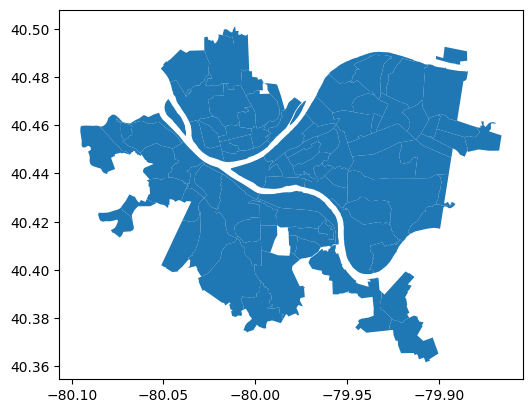

In [7]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

neighborhoods.columns

In [60]:
merged = neighborhoods.merge(df, left_on='hood', right_on='neighborhood', how='left')
df['neighborhood'] = df['neighborhood'].replace({
    'Mt. Washington': 'Mount Washington',
    'S. Side Flats': 'South Side Flats',
    'Mt. Oliver':'Mount Oliver'
})
print(df['neighborhood'])

0        Allegheny Center
1          Allegheny West
2               Allentown
3               Arlington
4       Arlington Heights
             ...         
85    Upper Lawrenceville
86               West End
87           West Oakland
88               Westwood
89                Windgap
Name: neighborhood, Length: 90, dtype: object


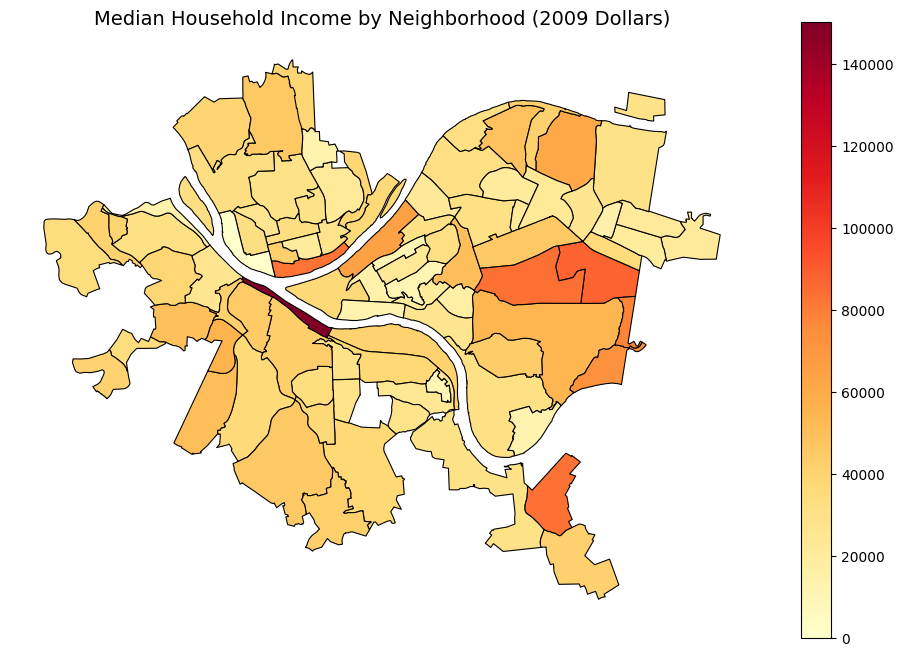

In [64]:
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='med_income_09',
            cmap='YlOrRd',
            linewidth=0.8,
            edgecolor='black',
            legend=True,
            ax=ax)

plt.title('Median Household Income by Neighborhood (2009 Dollars)', fontsize=14)
plt.axis('off')
plt.show()
